In [2]:
import sqlite3
import datetime
from dateutil.parser import parse
from os.path import expanduser, join
db_path = join(expanduser('~'),'.task_db.sqlite3')

In [121]:
import matplotlib.pyplot as plt

In [3]:
con = sqlite3.connect(db_path)

In [45]:
class TaskDB:
    def __init__(self, args):
        self.tid = args[0]
        self.start = parse(args[1]) if args[1] else None
        self.end = parse(args[2]) if args[2] else None
        self.name_id = args[3]
        self.comment = args[4]
        self.chain_backward = args[5]
        self.chain_forward = args[6]
        
    def __repr__(self):
        return '<TaskDB(id={}, start={}, end={}, name_id={}, back={}, forward={})>'.format(self.tid, self.start, self.end, self.name_id, self.chain_backward, self.chain_forward)

In [46]:
cur = con.execute('SELECT * FROM task')
tasks = [TaskDB(task) for task in cur.fetchall()]

In [181]:
for t in tasks:
    cur = con.execute('SELECT * FROM task_name WHERE id=?', (t.name_id,))
    name = cur.fetchone()
    t.name = name[1].decode('utf-8')
    
    cur = con.execute('SELECT * FROM window WHERE task_id=?', (t.tid,))
    windows = cur.fetchall()
    windows = [{'start': parse(w[1]), 'name': w[2]} for w in windows]
    for i,w in enumerate(windows[:-1]):
        w['length'] = (windows[i+1]['start'] - w['start']).seconds
    if t.end:
        windows[-1]['length'] = (t.end - windows[-1]['start']).seconds
    else:
        windows[-1]['length'] = 0
    t.windows = windows

In [182]:
def plot_task(task, minimum_length=0.01):

    unique_windows = {}
    for w in task.windows:
        if w['name'] not in unique_windows:
            unique_windows[w['name']] = [w['length']]
        else:
            unique_windows[w['name']].append(w['length'])

    for w, lens in unique_windows.items():
        unique_windows[w] = sum(lens)
    total_time = sum(unique_windows.values())
    for w, l in unique_windows.items():
        unique_windows[w] = l / total_time

    unique_windows = {w:l for w,l in unique_windows.items() if l>=0.01}

    plt.barh([x for x in range(len(unique_windows))], list(unique_windows.values()), tick_label=list(unique_windows.keys()))
    plt.show()


self driving course


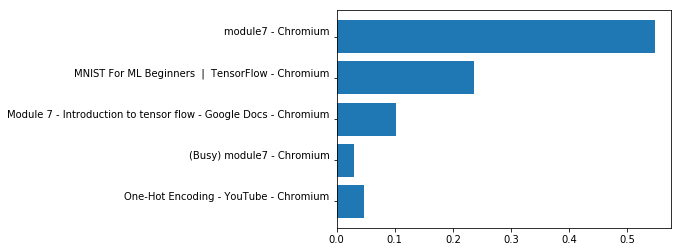

self driving course


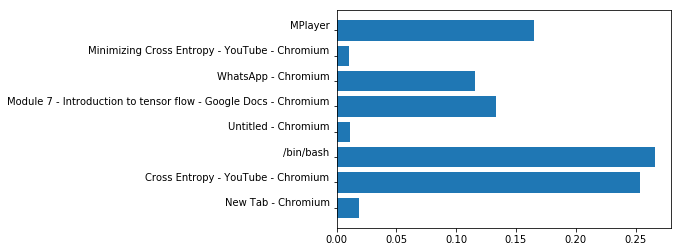

self driving course


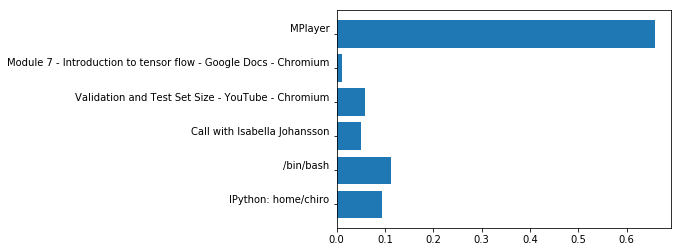

self driving course


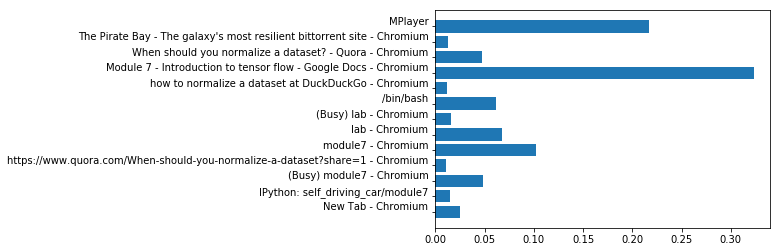

self driving course


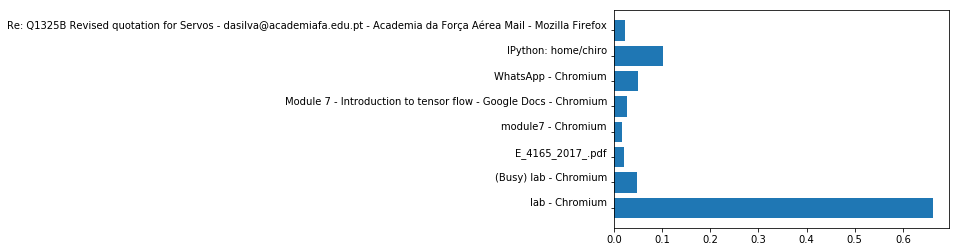

self driving course


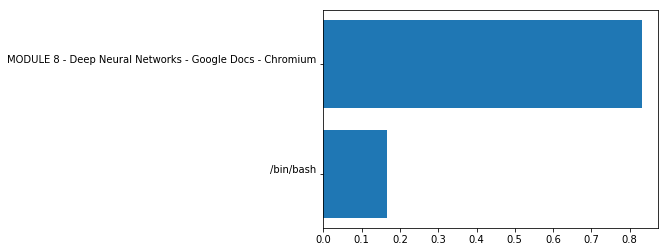

logwork app


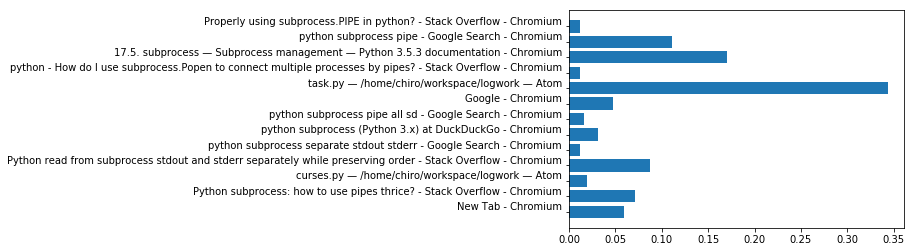

self driving course


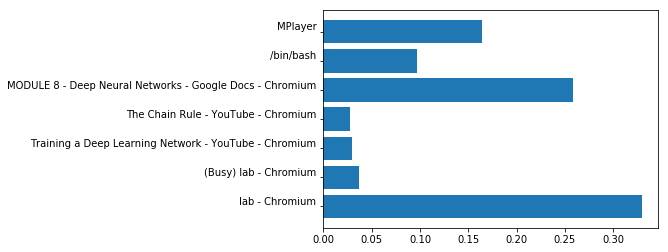

self-driving course


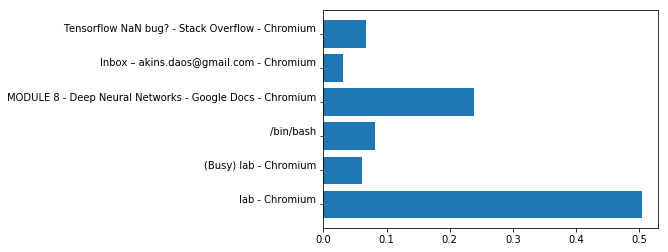

self-driving course


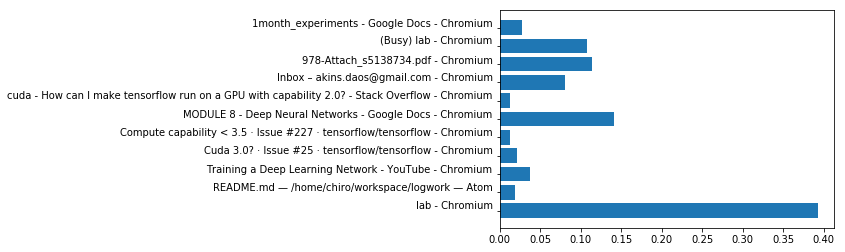

tensorflow office setup


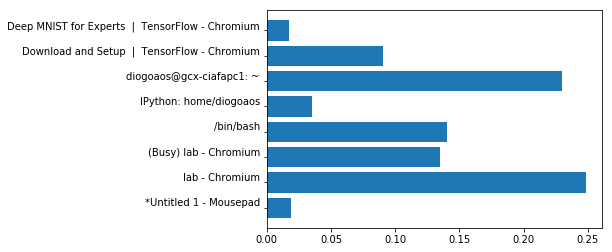

self driving course


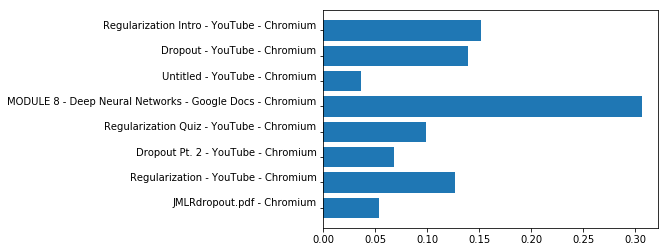

logowork data analysis


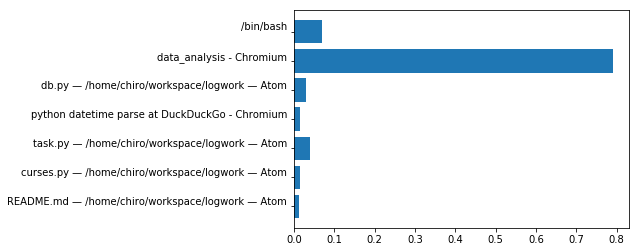

In [183]:
for task in tasks:
    print(task.name)
    plot_task(task)